# Assignment 4:
    test if the distribution of ages is the same for 
    
    1) male and female riders
    
    2) day and night riders
    
    use 3 tests: KS, Pearson's, Spearman's. 
    
    For the KS do the test with the entire dataset and with a subset 200 times smaller
    
    Choose a significant threshold for the whole exercise. 
    
    For each test phrase the Null Hypothesis in words.
    
    Describe the return of the scipy function you use in each case.
    
    State the result in terms of rejection of the Null.

In [1]:
# my usual imports and setups
import pylab as pl
import pandas as pd
import numpy as np
import os
import scipy.stats

%pylab inline


Populating the interactive namespace from numpy and matplotlib


In [2]:
### A function to download the data in case it's not there yet. 

def getCitiBikeCSV(datestring):
    '''
    Function that looks for a csv file with citibike data corresponding to the datestring in the PUIdata directory.
    If csv file is not there, looks for the corresponding zip file. If the zip file is there unzip it.
    If the zip file is not there either, the function downloads it from the citibike website and then unzip it. 
    '''
    
    print('Looking for the citibike data for the month ' + datestring + "...")
    
    ### First check if the csv file is not already at the directory
    if os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        print ("CSV File was already at the PUIdata directory.")
        
    # If the CSV is not there, now check if the ZIP File is already there.
    # If the ZIP File is there, unzip it and move the unzipped CSV to the PUIdata directory
    elif os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip"):
            print('ZIP File was already at the PUIdata directory.')
            
            # unzip the csv 
            os.system("unzip " + os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip")
            print('CSV File unzipped.')
            
            # Move the CSV to the PUIdata directory
            os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA"))
    
    else :
        # Download the Zip File; move it to the PUIdata directory; unzip it; move the csv to the PUIdata directory.
        print ("Downloading", datestring)
        
        # Downloading the ZIP File
        os.system("curl -O https://s3.amazonaws.com/tripdata/" + datestring + "-citibike-tripdata.zip")
        print ("ZIP File downloaded.")
        
        # Moving it to the PUIdata directory
        os.system("mv " + datestring + "-citibike-tripdata.zip " + os.getenv("PUIDATA"))
        
        # unzip the csv 
        os.system("unzip " + os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip")
        
        # and move it to the PUIdata directory
        os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA"))
           
    ### One final check:
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        print ("WARNING!!! something is wrong: the file is not there!")

    else:
        print ("CSV File in place, you can continue.\n")

# I am reading in data from January 2015. It would be a good idea to use data from warmer months, since there are more riders in the warm weather and the more data the smaller the STATISTICAL NOISE. You should use data from multiple months, joining multiple datasets, thus addressing systematic errors as well

In [3]:
datestring = '201508'
getCitiBikeCSV(datestring)

Looking for the citibike data for the month 201508...
CSV File was already at the PUIdata directory.
CSV File in place, you can continue.



In [4]:
df = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring + '-citibike-tripdata.csv')
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,1202,8/1/2015 00:00:04,8/1/2015 00:20:07,168,W 18 St & 6 Ave,40.739713,-73.994564,385,E 55 St & 2 Ave,40.757973,-73.966033,23253,Subscriber,1987.0,1
1,301,8/1/2015 00:00:05,8/1/2015 00:05:06,450,W 49 St & 8 Ave,40.762272,-73.987882,479,9 Ave & W 45 St,40.760193,-73.991255,22675,Subscriber,1951.0,2
2,431,8/1/2015 00:00:06,8/1/2015 00:07:18,312,Allen St & E Houston St,40.722055,-73.989111,296,Division St & Bowery,40.714131,-73.997047,19831,Subscriber,1985.0,1
3,273,8/1/2015 00:00:09,8/1/2015 00:04:43,382,University Pl & E 14 St,40.734927,-73.992005,229,Great Jones St,40.727434,-73.993790,22765,Subscriber,1975.0,1
4,1256,8/1/2015 00:00:17,8/1/2015 00:21:13,352,W 56 St & 6 Ave,40.763406,-73.977225,432,E 7 St & Avenue A,40.726218,-73.983799,22127,Subscriber,1978.0,1


In [5]:
# df is the dataframe where the content of the csv file is stored
# df['date'] = pd.to_datetime(df['starttime'])
# note that with dataframes I can refer to variables as dictionary keys, 
# i.e. df['starttime'] or as attributes: df.starttime. 
# df.head()

In [6]:
df.columns

Index([u'tripduration', u'starttime', u'stoptime', u'start station id',
       u'start station name', u'start station latitude',
       u'start station longitude', u'end station id', u'end station name',
       u'end station latitude', u'end station longitude', u'bikeid',
       u'usertype', u'birth year', u'gender'],
      dtype='object')

# BY GENDER
splitting data by gender and extracting the age happens in the cell below

In [7]:
#df is the dataframe where the content of the csv file is stored
df['ageM'] = 2015 - df['birth year'][(df['usertype'] == 'Subscriber') & (df['gender'] == 1)]
df['ageF'] = 2015 - df['birth year'][(df['usertype'] == 'Subscriber') & (df['gender'] == 2)]

In [8]:
#dropping some data I no longer need
df.drop([u'tripduration', u'start station id',
       u'start station name', u'start station latitude',
       u'start station longitude', u'end station id', u'end station name',
       u'end station latitude', u'end station longitude', u'bikeid'], axis=1, inplace=True)
df.head()

,starttime,stoptime,usertype,birth year,gender,ageM,ageF
0,8/1/2015 00:00:04,8/1/2015 00:20:07,Subscriber,1987.0,1,28.0,NaN
1,8/1/2015 00:00:05,8/1/2015 00:05:06,Subscriber,1951.0,2,NaN,64.0
2,8/1/2015 00:00:06,8/1/2015 00:07:18,Subscriber,1985.0,1,30.0,NaN
3,8/1/2015 00:00:09,8/1/2015 00:04:43,Subscriber,1975.0,1,40.0,NaN
4,8/1/2015 00:00:17,8/1/2015 00:21:13,Subscriber,1978.0,1,37.0,NaN


In [85]:
#your df should look something like this
# look at these data carefully... you may see someinteresting values!
df.describe()

,birth year,gender,ageM,ageF
count,958043.000000,1.179044e+06,720722.000000,235991.000000
mean,1977.144026,1.011590e+00,38.302869,36.454365
std,11.337429,6.233660e-01,11.352888,11.022477
min,1885.000000,0.000000e+00,16.000000,16.000000
25%,NaN,1.000000e+00,NaN,NaN
50%,NaN,1.000000e+00,NaN,NaN
75%,NaN,1.000000e+00,NaN,NaN
max,1999.000000,2.000000e+00,130.000000,90.000000


In [10]:
# dropping NaN values
df['ageM'].dropna(inplace= True)
df['ageF'].dropna(inplace= True)

df.describe()

,birth year,gender,ageM,ageF
count,958043.000000,1.179044e+06,720722.000000,235991.000000
mean,1977.144026,1.011590e+00,38.302869,36.454365
std,11.337429,6.233660e-01,11.352888,11.022477
min,1885.000000,0.000000e+00,16.000000,16.000000
25%,NaN,1.000000e+00,NaN,NaN
50%,NaN,1.000000e+00,NaN,NaN
75%,NaN,1.000000e+00,NaN,NaN
max,1999.000000,2.000000e+00,130.000000,90.000000


lets split age in 10 year bins. the dataset is very large, so i could be split in smaller bins, but I will chose 10 years in the interest of time. 
the bin size choice should be a balance between properly sample the age space, have enough counts in each bin that the statistical noise is not significant (remember that is > sqrt(N)!) and the computational requirement to computatinal facilities ratio. 

the next several steps are needed if you want to code up the KS test from scratch. that is for extra credit, so if you do not want to do it you may not need to plot split the distribution in bins and create the cumulative HOWEVER it is a great idea to do it anyways to explore your data viaually! remember Ascombe's quartet!!

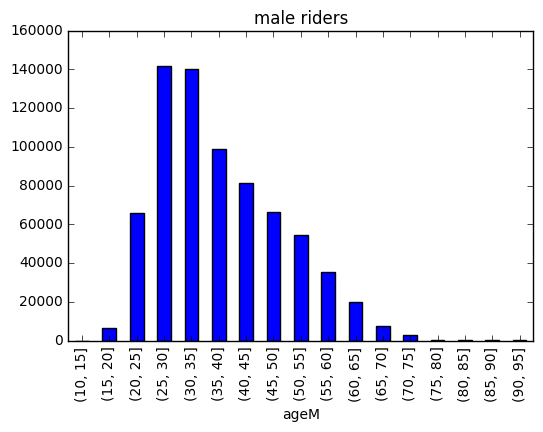

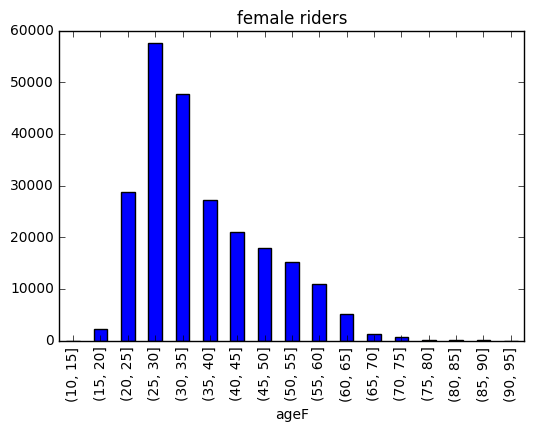

In [11]:
# plotting histograms with pandas is a bitdifferent than with pylab
# this is a VERY USEFUL syntaxfor you to knonw!
bins = np.arange(10, 99, 5)
axM = df.ageM.groupby(pd.cut(df.ageM, bins)).agg([count_nonzero]).plot(kind='bar',legend=False)
axM.set_title("male riders")
axF = df.ageF.groupby(pd.cut(df.ageF, bins)).agg([count_nonzero]).plot(kind='bar',
                                                                legend=False)
axF.set_title("female riders")


### Figure 1: histogrammed distribution of riders' ages by gender

this is how the cumulative distributions look like.  Notice that i am normalizing them! if i want to reat an observed distribution like a probablility distribution i have to normalize it

          count_nonzero
ageM                   
(10, 15]       0.000000
(15, 20]       0.000755
(20, 25]       0.031607
(25, 30]       0.079080
(30, 35]       0.086715
(35, 40]       0.065389
(40, 45]       0.041519
(45, 50]       0.025401
(50, 55]       0.014859
(55, 60]       0.012054
(60, 65]       0.006234
(65, 70]       0.000976
(70, 75]       0.000055
(75, 80]       0.000345
(80, 85]       0.000086
(85, 90]       0.000001
(90, 95]       0.000000


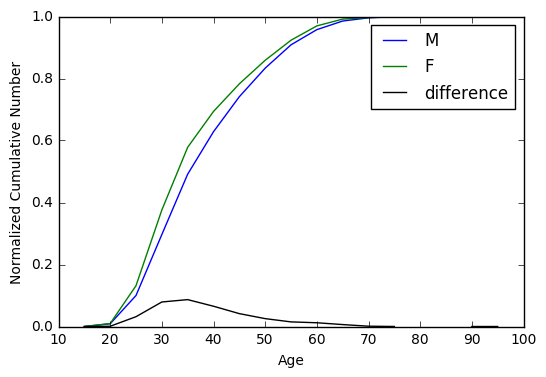

In [12]:
#print df.ageS, df.ageS.cumsum()

csM=df.ageM.groupby(pd.cut(df.ageM, bins)).agg([count_nonzero]).cumsum()

csF=df.ageF.groupby(pd.cut(df.ageF, bins)).agg([count_nonzero]).cumsum()

print (np.abs(csM / csM.max()-csF / csF.max()))

pl.plot(bins[:-1] + 5, csM / csM.max(), label = "M")
pl.plot(bins[:-1] + 5, csF / csF.max(), label = "F")
pl.plot(bins[:-1] + 5, np.sqrt(csF / csF.max() - csM / csM.max())**2, 'k-',
        label = "difference")
pl.xlabel("Age")
pl.ylabel("Normalized Cumulative Number")
pl.legend()

### Figure 2: the cumulative distribution of CitiBike riders' ages by gender

They look similar! But the difference gets to 10%. If I wanted to code the KS test by hand I woud have everything I need: the normalized cumulative distributions can be subtracted from each other and the max distance can calculated. 

Notice that there may be NaN values you are gonna have to deal with! 
You can do that for example with a Boolean statementsuch as  df.ageF[~np.isnan(df.ageF)] or you can use numpy functions that deal with Nan values: nansum, nanmean, nanstd...

lets run the scipy KS test

# KS tests to compare 2 samples

http://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.stats.ks_2samp.html


$H_0: AGE_M = AGE_F$ 

$H_a: AGE_M \neq AGE_F$

$\alpha = 0.05$

In [13]:
ks = scipy.stats.ks_2samp(df.ageM, df.ageF)
print (ks)

Ks_2sampResult(statistic=0.11573706560792094, pvalue=0.0)


# Analysis

       
**Since the p-value was extremely low (lower than the precision of the machine, therefore equal to zero) (much lower than the significance level of $\alpha = 0.05$ we can reject the Null Hypothesis that the ages are the same and conclude that the ages from male and female riders have a statistically significant difference**

A noteworthy observation though is that the sample is extremely large and basically any small difference between the two samples would be considered statistically significant, including any extremely small statistical noise. Therefore, a test with such a large sample is definitely not suitable for this specific problem, since the sample size effect is basically dictating alone the final result of the test.   



The scipy.stats KS test already tells me the significance and the p-value. 

The next few cells are here just to show you how you would obtain the same result by hand, but they are **not required**. 

Remember: the Null hypothesis is rejected if 

$D_KS(n1,n2) > c(\alpha) \sqrt{\frac{(n1 + n2)}{n1n2}}$

(see class notes) where $c(\alpha$) is the inverse of the KS distribution, and you do not have to know how to get that cause there are tables that list critical values!! 

http://www.real-statistics.com/tests-normality-and-symmetry/statistical-tests-normality-symmetry/kolmogorov-smirnov-test/kolmogorov-distribution/

But also this result depends in your choice of binning through, and thus, the result you get by hand may not be exactly the same as the one the KS returns. Either way: this is how you would calculate the KS statistics by hand.

# Alternative Analysis

Another way to evaluate the result of the KS test is to analyze the "statistic" value returned by the method.

In [14]:
# alpha = 0.05 -> c(alpha) = 1.36
c_alpha = 1.36
test_check = c_alpha * sqrt((df.ageM.count() + df.ageF.count())/float(df.ageM.count() * df.ageF.count()))

print (ks[0], test_check)

(0.11573706560792094, 0.0032255080950780424)


Since the KS-statistic is greater than  $c(\alpha) \sqrt{\frac{(n1 + n2)}{n1n2}}$, the Null Hypothesis can be rejected. 

# Now redo the test with a subsample of the data: take only 1 ride every of 200 

In [15]:
## your words here!...
## this cell is for you to redo the test with reducted dataset 
## and tell me what the scipy KS test returned and what it means in terms of NULL HYPOTHESIS

# Selecting random rows at the proportion of 1 : 200
np.random.seed(247)
sample_index = np.random.randint(0, df.starttime.count(), size= df.starttime.count()//200)
df_red = df.loc[list(sample_index)]
df_red.describe()

,birth year,gender,ageM,ageF
count,4826.000000,5895.000000,3613.000000,1204.000000
mean,1977.203067,1.021374,38.254913,36.443522
std,11.352578,0.621865,11.495608,10.823958
min,1935.000000,0.000000,16.000000,18.000000
25%,NaN,1.000000,NaN,NaN
50%,NaN,1.000000,NaN,NaN
75%,NaN,1.000000,NaN,NaN
max,1999.000000,2.000000,80.000000,75.000000


In [84]:
# dropping NaN values
df_red['ageM'].dropna(inplace= True)
df_red['ageF'].dropna(inplace= True)

In [17]:
ks = scipy.stats.ks_2samp(df_red.ageM, df_red.ageF)
print (ks)

Ks_2sampResult(statistic=0.10699412328864513, pvalue=1.7679924536679804e-09)


In [18]:
# alpha = 0.05 -> c(alpha) = 1.36
c_alpha = 1.36
test_check = c_alpha * sqrt((df_red.ageM.count() + df_red.ageF.count())/float(df_red.ageM.count() * df_red.ageF.count()))

print (ks[0], test_check)

(0.10699412328864513, 0.045256400313544262)


### Analysis

From this test we can also reject the Null Hypothesis that the ages are the same.
Both alternatives of performing the test give the same result: just verifying that the p-value is lower than confidence level; and also verifying that $D_KS(n1,n2) > c(\alpha) \sqrt{\frac{(n1 + n2)}{n1n2}}$. 

This alternative with a smallere sample is more reasonable, but the size effect seems to be still relatively big, once the p-value is still extremely low: ~ $(10^{-9})$.


# Pearson's  test for correlation

## notice that the Pearson's is a pairwise test: the samples need to be 
## a. sorted and 
## b. the same size!

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html#scipy.stats.pearsonr



$ H_0:$ the age distribution of male riders and female riders do not follow a similar fashion, i.e. are not significanly correlated.

$ H_a:$ the age distribution of male riders and female riders do follow a similar fashion, i.e. are significanly correlated.

$\alpha = 0.05$

In [77]:
# your code here!
# wrangle the data as needed
# please perform the Pearson's test 
# and tell me what you find in terms of NULL hypothesis

# getting sample of the same size and sorting them. 
ageM = df_red.ageM[:len(ageF)]
ageF = df_red.ageF.sort_values()

ageM.sort_values(inplace = True)

print (ageF.shape, ageM.shape)
print (ageF.head())
print (ageM.head())

((1204,), (1204,))
854653     18.0
453051     18.0
1094021    18.0
77563      19.0
341192     19.0
Name: ageF, dtype: float64
165205     17.0
1113206    17.0
1126659    18.0
136365     19.0
704307     19.0
Name: ageM, dtype: float64


In [78]:
Pearson = scipy.stats.pearsonr(ageM, ageF)

print ("Correlation coeficient: %.6f") % Pearson[0]
print ("p-value: %.6f") % Pearson[1]

Correlation coeficient: 0.996927
p-value: 0.000000


### Analysis

The test shows that the two variables are extremely correlated , since they have a correlation coefficient very close to 1. Besides that, the p-value was so low that was below the machine's precision limit (therefore printed as zero). 

Since the p-value was much lower than the previously estabilished significance level, we can reject the Null Hypothesis that the variables are not correlated.

The search for a Pearson's correlation coefficient in this case doesn't seem to be very useful though. The null-alternative hypotheses that we have to formulate to run this type of analysis doesn't add much valuable information for what we already knew: ages from male and female riders are distributed accross a similar range and, if we sort the observations in ascending order, two consecutive observations from the men ages will have a variation that is similar to the variation between two consecutive observations of women ages.  

# Spearman's  test for correlation

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.spearmanr.html#scipy.stats.spearmanr

$ H_0:$ the age distribution of male riders and female riders do not follow a similar similar fashion, i.e., are not significanly correlated.

$ H_a:$ the age distribution of male riders and female riders do follow a similar similar fashion, i.e., are significanly correlated.

$\alpha = 0.05$

In [21]:
# your code here!
# wrangle the data as needed
# please perform the Spearman's test and tell me what you find in terms of NULL hypothesis


In [83]:
Spearman = scipy.stats.spearmanr(ageM, ageF)
Spearman

SpearmanrResult(correlation=0.99880330693067476, pvalue=0.0)

### Analysis

The test shows that the two variables are extremely correlated , since they have a correlation coefficient very close to 1. Besides that, the p-value was so low that was below the machine's precision limit (therefore printed as zero). 

Since the p-value was much lower than the previously estabilished significance level, we can reject the Null Hypothesis that the variables are not correlated.

Similarly to what happened for the Pearson's correlation coefficient, the search for a Spearman's correlation coefficient doesn't seem to be very useful in this case. The null-alternative hypotheses that we have to formulate to run this type of analysis doesn't add much valuable information for what we already knew: ages from male and female riders are distributed accross a similar range and, if we sort the observations in ascending order, two consecutive observations from the men ages will have a variation that is similar to the variation between two consecutive observations of women ages.  

## please comment on the numbers that you get in the light of the scipy manual: what is rerutned? what does it mean??

## EXTRA CREDIT:  CHOOSE ONE OF THE TESTS, AND TEST THE CORRELATION OF AGES  OF RIDERS DURING THE DAY VS DURING THE NIGHT!

